# Message Passing Algorithm

## Jointree

In [1]:
import networkx as nx

def get_jointree():
    g = nx.Graph()

    clusters = ['ABD', 'ADE', 'DEF', 'ACE', 'CEG', 'EGH']
    sepsets = ['AD', 'DE', 'AE', 'CE', 'EG']

    for n in clusters:
        g.add_node(n, type='cluster', nodes=set(n))
    for n in sepsets:
        g.add_node(n, type='sepset', nodes=set(n))
    
    g.add_edges_from([
        ('ABD', 'AD'), ('AD', 'ADE'),
        ('ADE', 'DE'), ('DE', 'DEF'),
        ('ADE', 'AE'), ('AE', 'ACE'),
        ('ACE', 'CE'), ('CE', 'CEG'),
        ('CEG', 'EG'), ('EG', 'EGH')
    ])
    
    return g

g = get_jointree()

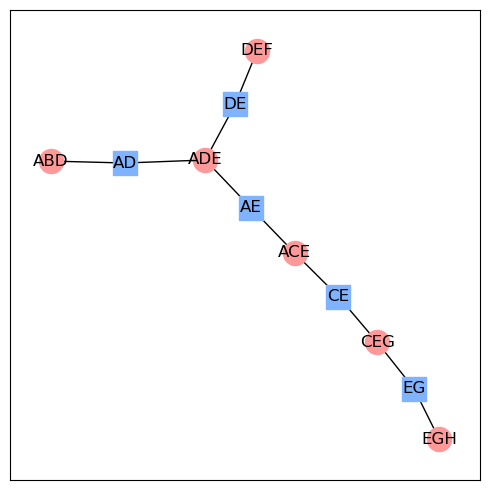

In [2]:
import matplotlib.pyplot as plt

pos = nx.nx_agraph.graphviz_layout(g, prog='neato')
cluster_n = list(filter(lambda n: g.nodes[n]['type'] == 'cluster', g.nodes()))
sepset_n = list(filter(lambda n: g.nodes[n]['type'] == 'sepset', g.nodes()))

fig, ax = plt.subplots(figsize=(5, 5))

nx.draw_networkx_edges(g, pos, ax=ax)
nx.draw_networkx_nodes(g, pos, ax=ax, nodelist=cluster_n, node_color='#ff9999', node_shape='o', alpha=1)
nx.draw_networkx_nodes(g, pos, ax=ax, nodelist=sepset_n, node_color='#80b3ff', node_shape='s', alpha=1)
nx.draw_networkx_labels(g, pos, ax=ax)

fig.tight_layout()

## Collect, Distribute

In [3]:
import itertools

def cwalk(x, s, y, g, marked, messages):
    marked.append(y)
    
    for _s in g.neighbors(y):
        for _y in g.neighbors(_s):
            if _y in marked:
                continue
            cwalk(y, _s, _y, g, marked, messages)

    m = y, s, x
    messages.append(m)

def dwalk(x, g, marked, messages):
    marked.append(x)
    
    for s in g.neighbors(x):
        for y in g.neighbors(s):
            if y in marked:
                continue

            m = x, s, y
            messages.append(m)

            dwalk(y, g, marked, messages)

def collect(x, g):
    messages = []
    marked = [x]

    for s in g.neighbors(x):
        for y in g.neighbors(s):
            if y in marked:
                continue
            cwalk(x, s, y, g, marked, messages)

    return messages

def distribute(x, g):
    messages = []
    marked = []

    dwalk(x, g, marked, messages)

    return messages

In [4]:
collect('ACE', g)

[('ABD', 'AD', 'ADE'),
 ('DEF', 'DE', 'ADE'),
 ('ADE', 'AE', 'ACE'),
 ('EGH', 'EG', 'CEG'),
 ('CEG', 'CE', 'ACE')]

In [5]:
distribute('ACE', g)

[('ACE', 'AE', 'ADE'),
 ('ADE', 'AD', 'ABD'),
 ('ADE', 'DE', 'DEF'),
 ('ACE', 'CE', 'CEG'),
 ('CEG', 'EG', 'EGH')]